# **등굣길**
계속되는 폭우로 일부 지역이 물에 잠겼습니다. 물에 잠기지 않은 지역을 통해 

학교를 가려고 합니다. 집에서 학교까지 가는 길은 m x n 크기의 격자모양으로 

나타낼 수 있습니다.

아래 그림은 m = 4, n = 3 인 경우입니다.

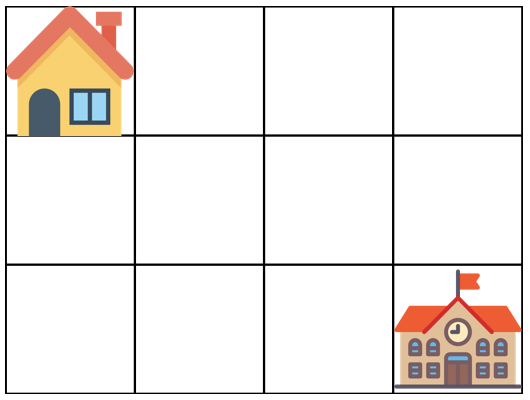

가장 왼쪽 위, 즉 집이 있는 곳의 좌표는 (1, 1)로 나타내고 가장 오른쪽 아래, 즉 

학교가 있는 곳의 좌표는 (m, n)으로 나타냅니다.

격자의 크기 m, n과 물이 잠긴 지역의 좌표를 담은 2차원 배열 puddles이 매개변수로

 주어집니다. 오른쪽과 아래쪽으로만 움직여 집에서 학교까지 갈 수 있는 최단경로의
 
  개수를 1,000,000,007로 나눈 나머지를 return 하도록 solution 함수를 
  
  작성해주세요.

## **제한사항**

*   격자의 크기 m, n은 1 이상 100 이하인 자연수입니다.
    * m과 n이 모두 1인 경우는 입력으로 주어지지 않습니다.
*   물에 잠긴 지역은 0개 이상 10개 이하입니다.
*   집과 학교가 물에 잠긴 경우는 입력으로 주어지지 않습니다.

**입출력 예**

m	= 4

n	= 3

puddles = [[2, 2]]

return = 4


**입출력 예 설명**

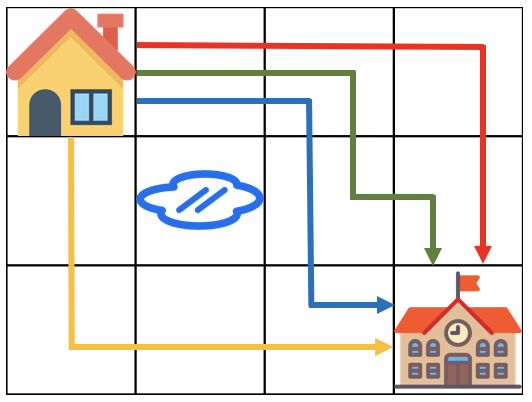

In [ ]:
#Dynamic programming
import numpy as np
def solution(m, n, puddles):
    answer = 0
    sub = 1000000007
    graph = np.zeros((m,n))
    for elem in puddles:
        graph[elem[0]-1][elem[1]-1] = -1
    graph[0][0] = 1
    for n_index in range(n):
        for m_index in range(m):
            if n_index == 0 and m_index > 0:
                if graph[m_index][0] == -1:
                    continue
                elif graph[m_index-1][0] != -1:
                    graph[m_index][0] = graph[m_index-1][0]
                else:
                    graph[m_index][0] = 0
            elif m_index == 0 and n_index > 0:
                if graph[0][n_index] == -1:
                    continue
                elif graph[0][n_index-1] != -1:
                    graph[0][n_index] = graph[0][n_index-1]
                else:
                    graph[0][n_index] = 0
            elif n_index > 0 and m_index > 0:
                if graph[m_index][n_index] == -1:
                    continue
                elif graph[m_index-1][n_index] == -1 and graph[m_index][n_index-1] == -1:
                    graph[m_index][n_index] = 0
                elif graph[m_index-1][n_index] == -1:
                    graph[m_index][n_index] = graph[m_index][n_index-1]
                elif graph[m_index][n_index-1] == -1:
                    graph[m_index][n_index] = graph[m_index-1][n_index]
                else:
                    graph[m_index][n_index] = (graph[m_index-1][n_index] + graph[m_index][n_index-1])%sub
                
    answer = graph[m-1][n-1]%sub
    return answer